In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

##### Step 1 we Import the csv dataset 

In [4]:
df =  pd.read_csv('./Data/Churn_Modelling.csv')
df.shape

(10000, 14)

##### An initial exploration of the first 5 rows data set shows its dataset showing clients transaction detais, Estimated Salary, Bank Balance, credit Scrore, Age and name etc

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### With df.copy() we make a copy of the initial data frame and keep the original data frame as df.

In [6]:
df2 =  df.copy()

In [7]:
df2.shape,df.shape

((10000, 14), (10000, 14))

##### Lets start with an analysis of the Age, EstimatedSalary and Credit Score.

In [8]:
df2[['EstimatedSalary','Age','CreditScore']].describe().round(1)

,EstimatedSalary,Age,CreditScore
count,10000.0,10000.0,10000.0
mean,100090.2,38.9,650.5
std,57510.5,10.5,96.7
min,11.6,18.0,350.0
25%,51002.1,32.0,584.0
50%,100193.9,37.0,652.0
75%,149388.2,44.0,718.0
max,199992.5,92.0,850.0


##### Age 92.0 seems to be an outliar so we will compare ages of Males and Females so we can get a better insight so we check by comparing mean and median

In [9]:
df2[['EstimatedSalary','Age','CreditScore']].median().round(1),df2[['EstimatedSalary','Age','CreditScore']].mean().round(1)

(EstimatedSalary    100193.9
 Age                    37.0
 CreditScore           652.0
 dtype: float64,
 EstimatedSalary    100090.2
 Age                    38.9
 CreditScore           650.5
 dtype: float64)

##### Since the mean and median are close this mean the data columns are evenly distriubuted, and outliars will have little or no effect on this distriution

##### Lets compare the age,Estimated Salary and Credit Score based on country 

In [10]:
df2.groupby('Geography')['CreditScore'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,5014.0,649.7,97.0,350.0,582.0,653.0,717.0,850.0
Germany,2509.0,651.5,98.2,350.0,584.0,651.0,722.0,850.0
Spain,2477.0,651.3,94.4,350.0,587.0,651.0,715.0,850.0


In [11]:
df2.groupby('Geography')['EstimatedSalary'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,5014.0,99899.2,57336.3,90.1,51399.2,99132.3,149295.4,199929.2
Germany,2509.0,101113.4,58263.0,11.6,51016.0,102397.2,151083.8,199970.7
Spain,2477.0,99440.6,57103.7,417.4,50267.7,99984.9,147278.4,199992.5


In [12]:
df2.groupby('Geography')['Age'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,5014,38,10,18,31,37,43,92
Germany,2509,39,10,18,32,38,45,84
Spain,2477,38,10,18,32,37,44,88


In [13]:
df2France = df2[df2['Geography'] == 'France'] 
df2France.shape

(5014, 14)

In [14]:
df2Spain = df2[df2['Geography'] == 'Spain'] 
df2Spain.shape

(2477, 14)

In [15]:
df2Germany = df2[df2['Geography'] == 'Germany'] 
df2Germany.shape

(2509, 14)

##### Comparing the mean and median for all countries to see if there is a large discripancy

In [16]:
df2France[['EstimatedSalary','Age','CreditScore']].median().round(1),df2France[['EstimatedSalary','Age','CreditScore']].mean().round(1)

(EstimatedSalary    99132.3
 Age                   37.0
 CreditScore          653.0
 dtype: float64,
 EstimatedSalary    99899.2
 Age                   38.5
 CreditScore          649.7
 dtype: float64)

In [17]:
difffSalSp,difffAgeSp,diffScrSp = (df2Spain[['EstimatedSalary','Age','CreditScore']].median().round(1)[0] - df2Spain[['EstimatedSalary','Age','CreditScore']].mean().round(1)[0],
df2Spain[['EstimatedSalary','Age','CreditScore']].median().round(1)[1] - df2Spain[['EstimatedSalary','Age','CreditScore']].mean().round(1)[1],
df2Spain[['EstimatedSalary','Age','CreditScore']].median().round(1)[2] - df2Spain[['EstimatedSalary','Age','CreditScore']].mean().round(1)[2])

difffSalSp.round(1) ,round(difffAgeSp) ,diffScrSp.round(1) 

(544.3, -2, -0.3)

In [18]:
difffSalaryGr,difffAgeGr,diffScrGr = (df2Germany[['EstimatedSalary','Age','CreditScore']].median().round(1)[0] - df2Germany[['EstimatedSalary','Age','CreditScore']].mean().round(1)[0],
df2Germany[['EstimatedSalary','Age','CreditScore']].median().round(1)[1] - df2Germany[['EstimatedSalary','Age','CreditScore']].mean().round(1)[1],
df2Germany[['EstimatedSalary','Age','CreditScore']].median().round(1)[2] - df2Germany[['EstimatedSalary','Age','CreditScore']].mean().round(1)[2])

difffSalaryGr.round(1) ,round(difffAgeGr) ,diffScrGr.round(1) 

(1283.8, -2, -0.5)

##### Since the mean and median are close this mean the data columns are evenly distriubuted, and outliars will have little or no effect on this distriution

##### Checking to see if there any null values in the dataset

In [19]:
df2.Gender.isnull().sum()

0

In [20]:
df2[df2[['EstimatedSalary', 'Geography','CreditScore','Gender','Age']].isnull().all(axis=1)].sum()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [21]:
df2.groupby('Geography')['EstimatedSalary','Age','CreditScore'].mean().round(1)

C:\Users\juud0\AppData\Local\Temp\ipykernel_12068\2837458731.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Geography')['EstimatedSalary','Age','CreditScore'].mean().round(1)


,EstimatedSalary,Age,CreditScore
Geography,,,
France,99899.2,38.5,649.7
Germany,101113.4,39.8,651.5
Spain,99440.6,38.9,651.3


##### In Summary Dataset has no NULL values so we do not need to replace any null values and Average Salary France ~99.800 Germany ~101,000 and Spain ~99,400

#### IQR gives us the Mersures of Dispersion while Mode Median and Mean gives us the measure of Measure of Central Tendency
##### Lower Limit = Q1 - 1.5*IQR and Upper Limit =  Q3 + 1.5*IQR

In [22]:
Q3,Q1 = df2.EstimatedSalary.quantile([0.75,0.25]).round(2)
Q3,Q1

(149388.25, 51002.11)

In [23]:
# Q3f,Q1f = df2France.EstimatedSalary.quantile([0.75,0.25]).round(2)
# Q3f,Q1f

In [24]:
Upper,Lower = Q3 +1.5 *(Q3-Q1), Q1-1.5 *(Q3-Q1)
round(Upper),round(Lower)

(296967, -96577)

In [25]:
df2[(df2.EstimatedSalary<Lower)|(df2.EstimatedSalary>Upper)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [26]:
df2[~(df2.EstimatedSalary<Lower)|(df2.EstimatedSalary>Upper)].shape

(10000, 14)

<AxesSubplot: xlabel='Geography', ylabel='EstimatedSalary'>

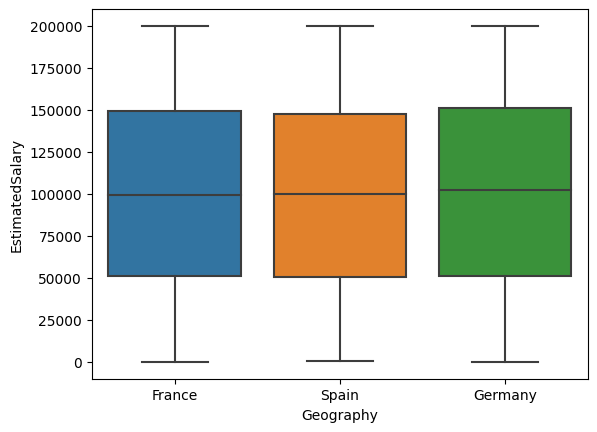

In [29]:

sns.boxplot(x='Geography',y='EstimatedSalary',data=df2)
